In [2]:
# Importando módulos necessários
import basedosdados as bd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

sns.set_style('darkgrid')

pd.set_option('display.max_columns', 100)

In [3]:
def download_dataset(dataset, table, id_proj):
    
    '''Essa função recebe informações sobre o dataset da Base dos Dados que o usuário deseja baixar e o retorna
    em um DataFrame pandas.
    
    ----------------------------------------------------------
    PARÂMETROS:
    
        dataset (string): id do dataset
        
        table (string): id da tabela
        
        id_proj (string): id do projeto Google Cloud do usuário'''
    
    # Checando se os tipos dos parâmetros são string
    if not ((type(dataset) == str) & (type(table) == str) & (type(id_proj) == str)):
        
        return print('Os valores para DATASET, TABLE e ID_PROJ devem ser do tipo string!')
    
    # Carregando a tabela em um DataFrame
    df = bd.read_table(dataset_id=dataset,
                      table_id=table,
                      billing_project_id=id_proj)
    
    return df

In [4]:
# Definindo o nome do dataset
dataset = 'br_denatran_frota'

# Definindo o nome da tabela
table = 'municipio_tipo'

# Definindo o ID do projeto no Google Cloud
id_proj = 'frota-de-veiculos-brasil'

# Carregando o dataset
df_frota = download_dataset(dataset, table, id_proj)

Downloading: 100%|██████████| 1149396/1149396 [08:58<00:00, 2134.66rows/s]


In [5]:
# Olhando os primeiros valores de df_frota
df_frota.head(10)

,sigla_uf,id_municipio,ano,mes,automovel,bonde,caminhao,caminhaotrator,caminhonete,camioneta,ciclomotor,microonibus,motocicleta,motoneta,onibus,quadriciclo,reboque,semireboque,sidecar,outros,tratoresteira,tratorrodas,triciclo,utilitario,chassiplataforma,total
0,AC,1200013,2004,1,82,0,36,3,7,55,0,230,22,7,0,2,3,1,0,0,0,0,0,0,0,448
1,AC,1200054,2004,1,28,0,8,0,1,13,0,34,13,0,0,0,0,0,0,0,0,0,0,0,0,97
2,AC,1200104,2004,1,266,0,68,6,33,95,0,438,235,3,0,7,6,0,0,0,0,0,0,0,0,1157
3,AC,1200138,2004,1,41,0,24,1,5,17,2,45,3,2,0,1,2,0,0,0,0,0,0,0,0,143
4,AC,1200179,2004,1,39,0,8,0,8,13,1,33,6,2,0,1,0,0,0,0,0,0,0,0,0,111
5,AC,1200203,2004,1,1306,0,209,0,173,500,17,2207,650,17,0,2,0,0,0,0,0,0,1,0,0,5082
6,AC,1200252,2004,1,175,0,52,1,17,60,0,244,119,5,0,3,2,0,0,0,0,0,0,0,0,678
7,AC,1200302,2004,1,39,0,23,0,23,25,0,230,78,0,0,0,0,0,0,0,0,0,0,0,0,418
8,AC,1200336,2004,1,40,0,14,1,9,22,1,228,39,3,0,0,0,0,0,0,0,0,0,0,0,357
9,AC,1200344,2004,1,7,0,3,0,2,0,0,30,2,0,0,0,0,0,0,0,0,0,0,0,0,44


In [6]:
# Checando as colunas de df_frota
df_frota.columns

Index(['sigla_uf', 'id_municipio', 'ano', 'mes', 'automovel', 'bonde',
       'caminhao', 'caminhaotrator', 'caminhonete', 'camioneta', 'ciclomotor',
       'microonibus', 'motocicleta', 'motoneta', 'onibus', 'quadriciclo',
       'reboque', 'semireboque', 'sidecar', 'outros', 'tratoresteira',
       'tratorrodas', 'triciclo', 'utilitario', 'chassiplataforma', 'total'],
      dtype='object')

In [7]:
# Checando o tipo das colunas e se existem valores nulos
df_frota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149396 entries, 0 to 1149395
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   sigla_uf          1149396 non-null  object
 1   id_municipio      1149396 non-null  object
 2   ano               1149396 non-null  int64 
 3   mes               1149396 non-null  int64 
 4   automovel         1149396 non-null  int64 
 5   bonde             1149396 non-null  int64 
 6   caminhao          1149396 non-null  int64 
 7   caminhaotrator    1149396 non-null  int64 
 8   caminhonete       1149396 non-null  int64 
 9   camioneta         1149396 non-null  int64 
 10  ciclomotor        1149396 non-null  int64 
 11  microonibus       1149396 non-null  int64 
 12  motocicleta       1149396 non-null  int64 
 13  motoneta          1149396 non-null  int64 
 14  onibus            1149396 non-null  int64 
 15  quadriciclo       1149396 non-null  int64 
 16  reboque           

In [8]:
# Separando o dataset por UF
df_uf = {}

for uf in set(df_frota['sigla_uf']):
    
    df_uf[uf] = df_frota[df_frota['sigla_uf'] == uf]

In [9]:
# Calculando medidas descritivas para a frota de SP
df_uf['SP'].drop(['ano', 'mes'], axis=1).describe()

,automovel,bonde,caminhao,caminhaotrator,caminhonete,camioneta,ciclomotor,microonibus,motocicleta,motoneta,onibus,quadriciclo,reboque,semireboque,sidecar,outros,tratoresteira,tratorrodas,triciclo,utilitario,chassiplataforma,total
count,1.335150e+05,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,1.335150e+05,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,133515.000000,133515.0,133515.000000,133515.000000,133515.000000,133515.0,133515.000000,1.335150e+05
mean,2.220228e+04,0.077527,924.737955,193.870412,2063.357990,1436.355114,149.914092,5.354731e+03,953.778969,207.144605,0.106475,373.423039,290.057117,2.783170,2.014133,0.0,12.947946,4.294394,217.168123,0.0,79.014508,3.446806e+04
std,1.939821e+05,0.964351,5205.271162,948.221474,15366.264751,14439.055965,1334.929115,3.107282e+04,5044.302310,1645.509600,1.566073,1842.815533,1454.687367,7.347757,20.189440,0.0,114.011720,32.662769,3338.515504,0.0,272.058229,2.741399e+05
min,7.100000e+01,0.000000,7.000000,0.000000,2.000000,2.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.400000e+02
25%,1.065000e+03,0.000000,87.000000,8.000000,134.000000,60.000000,8.000000,2.740000e+02,20.000000,18.000000,0.000000,34.000000,12.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,2.000000,1.809000e+03
50%,2.963000e+03,0.000000,249.000000,36.000000,368.000000,169.000000,21.000000,7.810000e+02,96.000000,45.000000,0.000000,100.000000,53.000000,0.000000,0.000000,0.0,0.000000,0.000000,7.000000,0.0,8.000000,5.036000e+03
75%,1.028950e+04,0.000000,704.000000,132.000000,1189.000000,615.000000,69.000000,3.284000e+03,549.000000,122.000000,0.000000,289.000000,201.000000,3.000000,1.000000,0.0,3.000000,2.000000,42.000000,0.0,43.000000,1.794200e+04
max,5.974692e+06,40.000000,139431.000000,32116.000000,541294.000000,495535.000000,40827.000000,1.061160e+06,189946.000000,49605.000000,220.000000,57240.000000,42506.000000,93.000000,887.000000,0.0,3454.000000,1432.000000,170791.000000,0.0,4385.000000,8.805180e+06


In [10]:
# Definindo um dataset para SP por ano
sp_per_year = df_uf['SP'].drop(['outros', 'utilitario', 'mes'], axis=1).groupby('ano').sum().drop(2021)

# Calculando uma versão normalizada do dataset
sp_norm = (sp_per_year - sp_per_year.mean()) / sp_per_year.std()

Text(0, 0.5, 'Total de Veículos')

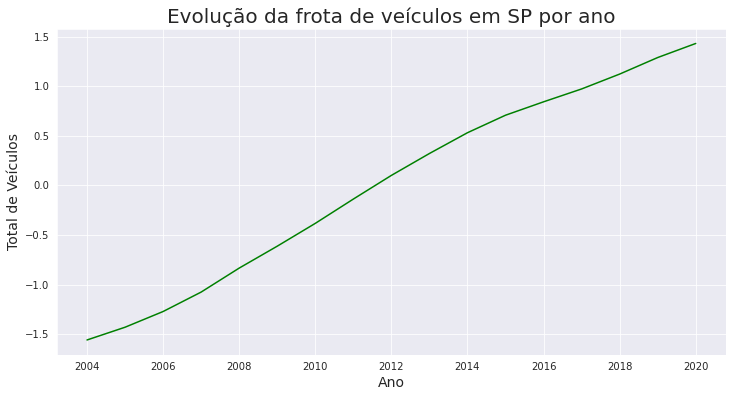

In [11]:
# Visualizando a evolução da frota de veículos em SP em versão normalizada
plt.figure(figsize=(12, 6))

sns.lineplot(data=sp_norm, x=sp_norm.index, y='total', color='green')

plt.title('Evolução da frota de veículos em SP por ano', fontsize=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Total de Veículos', fontsize=14)

In [12]:
# Calculando a porcentagem de cada tipo de transporte em SP
sp_percentage = sp_per_year.apply(lambda x: x / sp_per_year['total']).drop('total', axis=1)

In [13]:
sp_percentage

,automovel,bonde,caminhao,caminhaotrator,caminhonete,camioneta,ciclomotor,microonibus,motocicleta,motoneta,onibus,quadriciclo,reboque,semireboque,sidecar,tratoresteira,tratorrodas,triciclo,chassiplataforma
ano,,,,,,,,,,,,,,,,,,,
2004,0.702450,7.982872e-06,0.034886,0.004575,0.026311,0.067582,0.004813,0.111770,0.017705,0.007132,0.000004,0.010535,0.007409,0.000083,0.000037,0.000331,0.000047,0.000614,0.003708
2005,0.695331,7.646126e-06,0.034025,0.004737,0.032250,0.060522,0.004666,0.119552,0.018847,0.007002,0.000004,0.010576,0.007578,0.000096,0.000034,0.000327,0.000050,0.000876,0.003520
2006,0.685813,6.338570e-06,0.032919,0.004718,0.036339,0.055263,0.004546,0.129968,0.020450,0.006823,0.000004,0.010535,0.007559,0.000107,0.000032,0.000325,0.000051,0.001236,0.003306
2007,0.674513,5.145553e-06,0.031750,0.004755,0.041991,0.048341,0.004432,0.141663,0.022479,0.006725,0.000003,0.010191,0.007810,0.000110,0.000025,0.000325,0.000049,0.001754,0.003077
2008,0.662996,4.450209e-06,0.030581,0.004873,0.052759,0.037172,0.004362,0.152887,0.024053,0.006610,0.000003,0.009899,0.007935,0.000108,0.000021,0.000332,0.000053,0.002526,0.002823
2009,0.656664,3.152194e-06,0.029593,0.004996,0.057330,0.033310,0.004344,0.158261,0.024879,0.006437,0.000003,0.009759,0.008003,0.000102,0.000029,0.000350,0.000062,0.003248,0.002628
2010,0.652072,2.595917e-06,0.028744,0.005231,0.058885,0.033667,0.004360,0.160610,0.025524,0.006248,0.000009,0.009696,0.008129,0.000095,0.000037,0.000369,0.000076,0.003788,0.002457
2011,0.645569,2.203043e-06,0.028053,0.005573,0.060820,0.034658,0.004397,0.162982,0.026301,0.006159,0.000003,0.009710,0.008396,0.000090,0.000044,0.000395,0.000091,0.004462,0.002295
2012,0.640108,1.594229e-06,0.027316,0.005729,0.062460,0.035984,0.004419,0.164235,0.027303,0.006099,0.000003,0.009809,0.008525,0.000084,0.000047,0.000411,0.000110,0.005189,0.002167


Podemos notar uma diminuíção na porcentagem do total de automóveis (carros) no frota de SP. Qual foi o tipo (ou tipos) de transporte que absorveu essa diferença?

Precisamos, pois, encontrar uma correlação negativa entre a porcentagem de automóveis e os outros tipos de veículos.

<AxesSubplot:ylabel='ano'>

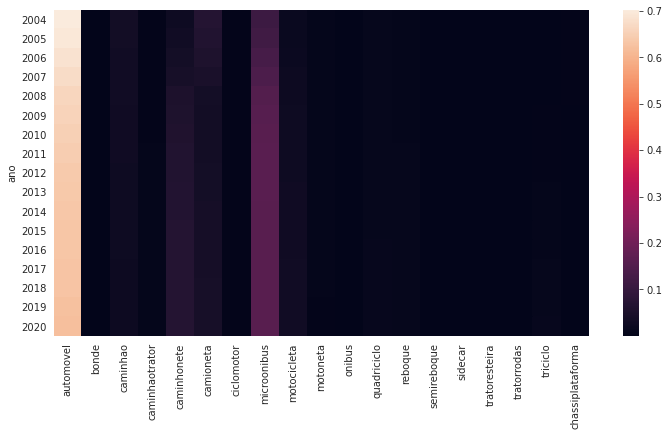

In [14]:
# Checando a correlação entre a porcentagem entre o tipo de veículo e o ano
plt.figure(figsize=(12,6))
sns.heatmap(sp_percentage)

Parece, então, que que MICROONIBUS e CAMINHONETE foram as porcentagens que mais creceram através dos anos.

In [15]:
def correlation(x, y, alpha=0.05):
    
    '''Essa função calcula a correlação entre duas variáveis.'''
    
    # Calculando os desvios padrões
    std_x = sum([xi * (1 - xi) for xi in x]) ** 0.5
    std_y = sum([yi * (1 - yi) for yi in y]) ** 0.5
    
    # Calculando as médias
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculando o coeficiente de correlação de Pearson
    r = sum([(xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y)]) / (std_x * std_y)
    
    return r

In [16]:
# Calculando a correlação para todas as colunas e imprimindo só aquelas em que a correlação é negativa
corr_neg = {}

for col in sp_percentage.columns:
    
    if not col == 'automovel':
        
        ro = correlation(sp_percentage["automovel"], sp_percentage[col])
        
        if ro < 0:
    
            print(f'{col}: {ro}\n')
        
            corr_neg[col] = ro

caminhaotrator: -0.00036887676634726784

caminhonete: -0.0029366856458258434

microonibus: -0.0020725580828494365

motocicleta: -0.0013943125869602124

quadriciclo: -0.00019248549591608462

reboque: -0.00025758312405386676

sidecar: -0.00012320551056300502

tratoresteira: -6.748287910715674e-05

tratorrodas: -0.00022743815521429023

triciclo: -0.002158083164290039



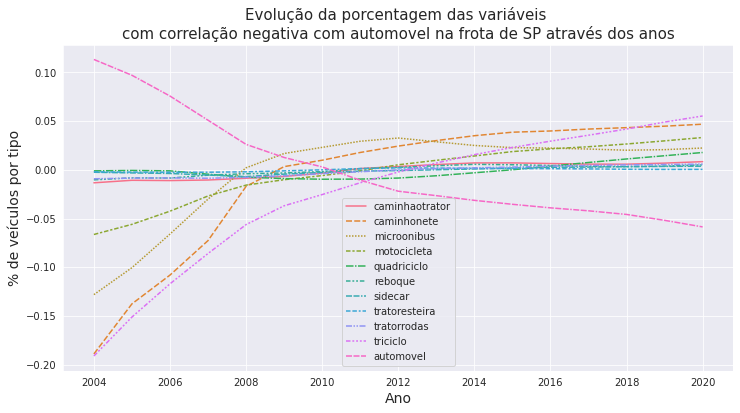

In [21]:
# Visualizando as porcentagens das variaveis identificadas acima através do tempo
sp_percentage_norm = (sp_percentage - sp_percentage.mean()) / ((sp_percentage * (1 - sp_percentage)) ** 0.5)

plt.figure(figsize=(12, 6))

sns.lineplot(data=sp_percentage_norm[list(corr_neg.keys()) + ['automovel']])

plt.xlabel('Ano', fontsize=14)
plt.ylabel('% de veículos por tipo', fontsize=14)
plt.title('Evolução da porcentagem das variáveis \ncom correlação negativa com automovel \
na frota de SP através dos anos', fontsize=15)

plt.show()

In [18]:
# Calculando a mudança em porcentagem dessa variáveis
for col in corr_neg.keys():
    
    diff = sp_percentage[col][2020] - sp_percentage[col][2004]
    
    print(f'{col}: {round(diff, 5)}')

caminhaotrator: 0.00156
caminhonete: 0.04208
microonibus: 0.04859
motocicleta: 0.01462
quadriciclo: 0.00209
reboque: 0.00136
sidecar: 5e-05
tratoresteira: 5e-05
tratorrodas: 0.00014
triciclo: 0.01054


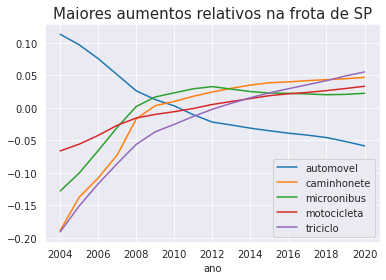

In [19]:
# Gráfico com os maiores aumentos relativos
sp_percentage_norm[['automovel', 'caminhonete', 'microonibus', 'motocicleta', 'triciclo']].plot()
plt.title('Maiores aumentos relativos na frota de SP', fontsize=15)
plt.show()

Vemos que as maiores mudanças foram na utilização de transporte público (microônibus) - com 4,8% - e na preferência pela caminhonete - com 4,2%.